In [1]:
from storm_analysis.daostorm_3d.mufit_analysis import analyze
import storm_analysis.sa_library.readinsight3 as readinsight3
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_i3 = './sample_plate-part.bin'

In [3]:
i3_reader = readinsight3.I3Reader(sample_i3)
frames = i3_reader.getNumberFrames()

w_x_mean_list = []
w_y_mean_list = []
for i in range(1, frames+1):
    data = i3_reader.getMoleculesInFrameRange(start = i, stop = i+1)
    molecules = len(data)
    
    xc = np.zeros(molecules)
    yc = np.zeros(molecules)
    zc = np.zeros(molecules)
    w = np.zeros(molecules)
    ratio = np.zeros(molecules)
    
    for j in range(molecules):
        w[j] = data[j][6]
        ratio[j] = data[j][8]
        
    w_x = np.sqrt(w*w/ratio)
    w_y = np.sqrt(w*w*ratio)
    
    # Outlier removal
    w_x_mean = np.mean(w_x, axis=0)
    w_x_sd = np.std(w_x, axis=0)

    w_x_final_list = [x for x in w_x if (x > w_x_mean - 2 * w_x_sd)]
    w_x_final_list = [x for x in w_x_final_list if (x < w_x_mean + 2 * w_x_sd)]
    
    w_y_mean = np.mean(w_y, axis=0)
    w_y_sd = np.std(w_y, axis=0)

    w_y_final_list = [y for y in w_y if (y > w_y_mean - 2 * w_y_sd)]
    w_y_final_list = [y for y in w_y_final_list if (y < w_y_mean + 2 * w_y_sd)]
    
    w_x_mean_updated = np.mean(w_x_final_list)
    w_y_mean_updated = np.mean(w_y_final_list)
    
    w_x_mean_list.append(w_x_mean_updated)
    w_y_mean_list.append(w_y_mean_updated)

('Version:', 'M425')
('Frames:', 1)
('Status:', 6)
('Molecules:', 185)



/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


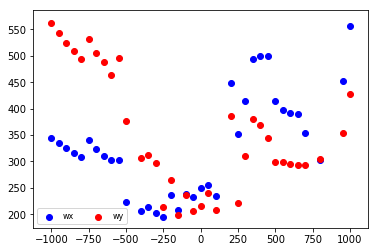

In [4]:
colors = ['b', 'r']

z = np.linspace(-1000, +1000, 41, dtype = float)

wx_plot = plt.scatter(z, w_x_mean_list, marker='o', c=colors[0], edgecolors = 'face')
wy_plot = plt.scatter(z, w_y_mean_list, marker='o', c=colors[1], edgecolors = 'face')

plt.legend((wx_plot, wy_plot),
           ('wx', 'wy'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()